In [3]:
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
import scipy.signal
# sns.color_palette("dark")
sns.set_palette("colorblind")
sns.set_style('white')
sns.set_context('talk')

In [4]:
def moving_average(x, w):
    x = np.convolve(x, np.ones(w), 'same') / w
    for i in range(0, int((w+1)/2)):
        x[i] = x[i] * (w/((w+1)/2 + i))
        if i != 0:
            x[-i] = x[-i] * (w/((w+1)/2 + i))
    return x

def moving_median(x, N):
    idx = np.arange(N) + np.arange(len(x)-N+1)[:,None]
    b = [row[row>0] for row in x[idx]]
    return np.array(map(np.median,b))

In [5]:
def parse_nohup(content):
    ep = []
    ep_curr = 0
    mofa_acc = []
    loss = []
    last_ktm = []
    first_ktm = []
    for line in content:
        if 'Epoch' in line:
#             ep.append(int(line[6:-1]))
            ep_curr += 1
            ep.append(ep_curr)
#         elif 'mofa' in line:
#             mofa_acc.append(int(line[-5:-3]))
        elif 'loss' in line:
            if '\t' in line:
                loss.append(float(line[15:-1]))
            else:
                loss.append(float(line[22:-1]))
        elif 'First' in line:
            first_ktm.append(float(line[11:]))
#             print(line)
        elif 'Last' in line:
            last_ktm.append(float(line[10:]))

    # ep.insert(0, -1)
    mofa_acc.insert(0, base_acc)
    mofa_acc = mofa_acc[:-1]

    mov_loss = moving_average(loss, 101)
#     mov_loss = scipy.signal.medfilt(loss, kernel_size=101)
    return ep, mofa_acc, mov_loss, loss, first_ktm, last_ktm

In [6]:
def plot_NAS(ep, mofa_acc, mov_loss, epoch_time_in_sec):
    xnew = np.arange(1, ep[-1] +1)*epoch_time_in_sec/60/60
    def forward(x):
        return np.interp(x, ep, xnew)


    def inverse(x):
        return np.interp(x, xnew, ep)

    f, ax = plt.subplots(1, figsize=(12, 6))
#     ax.set_axisbelow(False)
    ax.plot(ep, loss, zorder=1.0)
    ax.plot(ep, mov_loss, linewidth=3, zorder=1.1)
    ax.set_xlabel('Epoch')
    ax.set_ylabel('Random Subnet Loss', {'color':'C0'})
    ax.grid(True, zorder=55)

    ax2 = ax.twinx()
    ax2.plot(np.array(mofa_acc), 'C2')
    ax2.set_ylabel('MOFA Accuracy', {'color':'C2'})
    secax = ax.secondary_xaxis('top', functions=(forward, inverse))
    # secax.xaxis.set_minor_locator(AutoMinorLocator())
    secax.set_xlabel('RTX 2080Ti Hours')
    plt.show()

In [16]:
# with open('nohup_elstc_kernel_over4clamp_arch1.out', 'r') as f:
#     content = f.readlines()
# base_acc = 64
# epoch_time_in_sec = 13

# ep, mofa_acc, mov_loss, loss, first_ktm, last_ktm =  parse_nohup(content)
# plot_NAS(ep, mofa_acc, mov_loss, epoch_time_in_sec)

In [17]:
# with open('nohup_elstc_depth_over4clamp_arch1.out', 'r') as f:
#     content = f.readlines()
# base_acc = 64
# epoch_time_in_sec = 13

# ep, mofa_acc, mov_loss, loss, first_ktm, last_ktm =  parse_nohup(content)
# plot_NAS(ep, mofa_acc, mov_loss, epoch_time_in_sec)

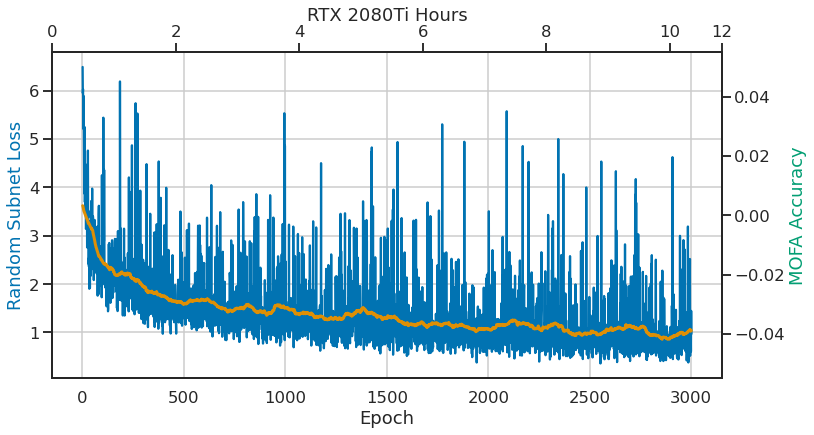

In [47]:
with open('nohup_elstc_kernel_over4clamp_arch1_BN.out', 'r') as f:
    content = f.readlines()
base_acc = 64
epoch_time_in_sec = 13

ep, mofa_acc, mov_loss, loss, first_ktm, last_ktm =  parse_nohup(content)
plot_NAS(ep, mofa_acc, mov_loss, epoch_time_in_sec)

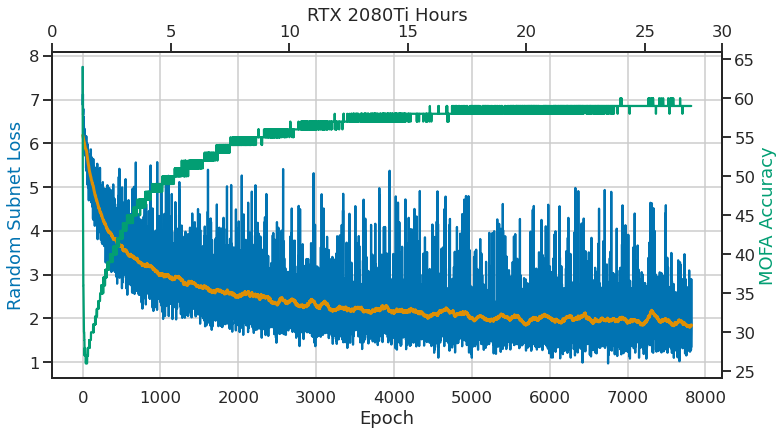

In [29]:
with open('nohup_elstc_depth_over4clamp_arch1_BN.out', 'r') as f:
    content = f.readlines()
base_acc = 64
epoch_time_in_sec = 13

ep, mofa_acc, mov_loss, loss, first_ktm, last_ktm =  parse_nohup(content)
plot_NAS(ep, mofa_acc, mov_loss, epoch_time_in_sec)

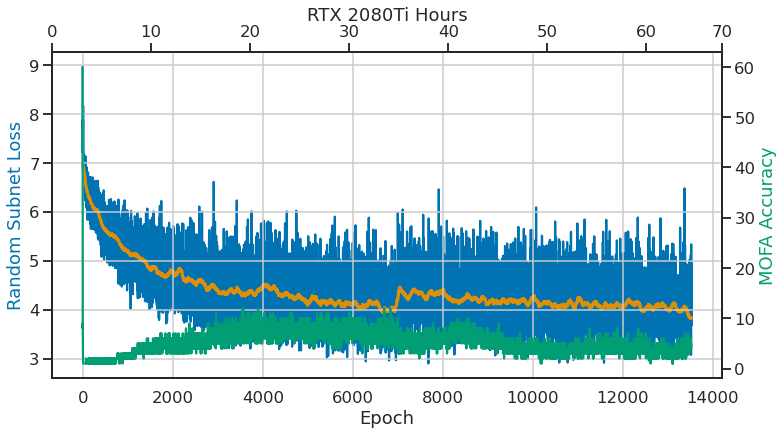

In [28]:
with open('nohup_elstc_width_over4clamp_arch1_BN.out', 'r') as f:
    content = f.readlines()
base_acc = 60
epoch_time_in_sec = 18

ep, mofa_acc, mov_loss, loss, first_ktm, last_ktm =  parse_nohup(content)
plot_NAS(ep, mofa_acc, mov_loss, epoch_time_in_sec)


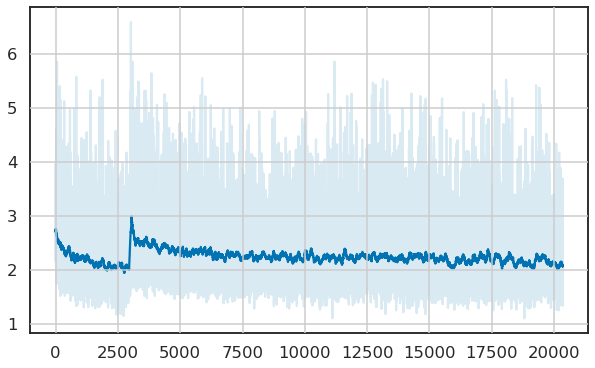

In [19]:
with open('MOFA/nohup_elstc_width_over4clamp_arch1_BN.out', 'r') as f:
    content = f.readlines()
base_acc = 60
epoch_time_in_sec = 18

ep, _, mov_loss, loss, first_ktm, last_ktm =  parse_nohup(content)
f, ax = plt.subplots(1, 1, figsize=(10, 6))
# plt.scatter(ep, loss, zorder=1.0, alpha=0.1)
plt.plot(ep, loss, zorder=1.0, alpha=0.15)
ax.set_axisbelow(False)
plt.plot(mov_loss, zorder=1.1, c="C0")
plt.grid(zorder=33)

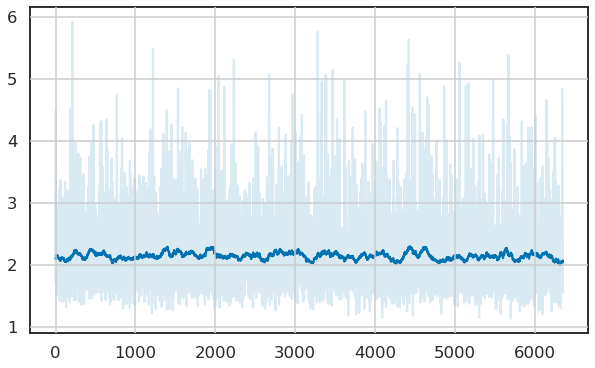

In [7]:
with open('MOFA/nohup_elstc_width_over4clamp_arch1_BN_part2.out', 'r') as f:
    content = f.readlines()
base_acc = 60
epoch_time_in_sec = 18

ep, _, mov_loss, loss, first_ktm, last_ktm =  parse_nohup(content)
f, ax = plt.subplots(1, 1, figsize=(10, 6))
# plt.scatter(ep, loss, zorder=1.0, alpha=0.1)
plt.plot(ep, loss, zorder=1.0, alpha=0.15)
ax.set_axisbelow(False)
plt.plot(mov_loss, zorder=1.1, c="C0")
plt.grid(zorder=33)

In [7]:
print(np.sum(mov_loss[5000:7000]) / 2000)
print(np.sum(mov_loss[6000:8000]) / 2000)
print(np.sum(mov_loss[7000:9000]) / 2000)
print(np.sum(mov_loss[8000:10000]) / 2000)
print(np.sum(mov_loss[9000:11000]) / 2000)
print(np.sum(mov_loss[9500:11500]) / 2000)
print(np.sum(mov_loss[17500:]) / (mov_loss.size-17500))

2.3046293130617332
2.267891499613771
2.2495705192478574
2.2351919604622488
2.2337265553651466
2.2227028030233806
2.159213773066333


In [8]:
print(np.sum(mov_loss[0:1000]) / 1000)
print(np.sum(mov_loss[1000:2000]) / 1000)
print(np.sum(mov_loss[2000:3000]) / 1000)
print(np.sum(mov_loss[3000:4000]) / 1000)
print(np.sum(mov_loss[4000:5000]) / 1000)

2.1432194678141823
2.184953696234391
2.159701985201033
2.1479441286077594
2.1478036631499187


In [2]:
10000*17/3600


47.22222222222222

In [11]:
0 1 2 3
C D A B
2 3 0 1 A B C D
B A C D inds: 1 0 2 3
3 2 0 1 A B C D




SyntaxError: invalid syntax (<ipython-input-11-440caab1e3f0>, line 1)

SyntaxError: invalid syntax (<ipython-input-12-f632707bf4ba>, line 1)